In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

%matplotlib inline
import mpld3
#for inline graph zooming
#mpld3.enable_notebook()

In [254]:
datadict = {}
with open('2013_movies.csv', "rb") as f:
    reader = csv.reader(f)
    # gets rid of header
    reader.next()
    for row in reader:
        datadict[row[0]] = row


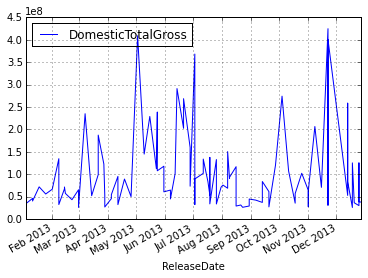

In [255]:
#1 Plot domestic total gross over time
df = pd.DataFrame.from_dict(datadict, orient='index')
df.rename(columns={0:'Title',1:'Budget',2:'DomesticTotalGross',3:'Director',4:'Rating',5:'Runtime',6:'ReleaseDate'}, inplace=True)
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'])
gross = df.loc[:,['DomesticTotalGross', 'ReleaseDate']].convert_objects(convert_numeric=True)
ts = gross.set_index('ReleaseDate').sort_index(axis=0, ascending=True)
ts.plot()

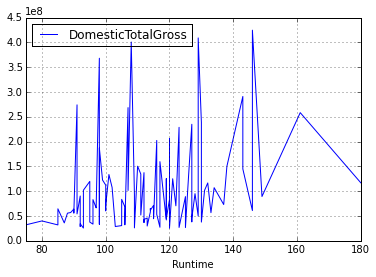

In [5]:
#2 Plot runtime vs domestic total gross
run_vs_gross = df.loc[:,['Runtime', 'DomesticTotalGross']].convert_objects(convert_numeric=True)
run_vs_gross.set_index('Runtime').sort_index(axis=0).plot()

In [6]:
#3 Group your data by Rating and find the average runtime and domestic total gross at each level of Rating
c3 = df.loc[:,['Runtime', 'DomesticTotalGross', 'Rating']].convert_objects(convert_numeric=True).sort_index(axis=0)
byrating = c3.groupby('Rating').mean()
print(byrating)

           Runtime  DomesticTotalGross
Rating                                
G       107.000000        2.684928e+08
PG       99.933333        1.311357e+08
PG-13   117.510638        1.114498e+08
R       110.729730        6.989243e+07


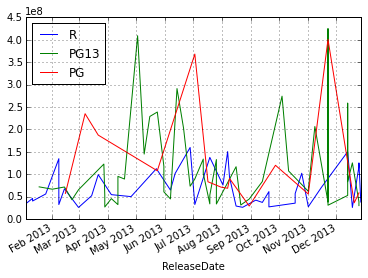

In [284]:
#4 Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross
c4 = df.convert_objects(convert_numeric=True)
c4 = c4[['Rating', 'ReleaseDate', 'DomesticTotalGross']]
c4 = c4.set_index(['ReleaseDate']).sort_index(axis=0)

ax = c4[(c4['Rating']=='R')].plot(label = 'R')
c4[(c4['Rating']=='PG-13')].plot(ax=ax)
c4[(c4['Rating']=='PG')].plot(ax=ax)

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, ['R','PG13', 'PG'], loc='best')


In [301]:
#5 What director in your dataset has the highest gross per movie?
c5 = df.convert_objects(convert_numeric=True)
c5 = c5[['Director', 'DomesticTotalGross']]
c5.groupby('Director', sort=True).mean().sort(columns='DomesticTotalGross', ascending=False)

,DomesticTotalGross
Director,
Francis Lawrence,424668047
Shane Black,409013994
Chris BuckJennifer Lee,400738009
Pierre CoffinChris Renaud,368061265
Zack Snyder,291045518
Alfonso Cuaron,274092705
Dan Scanlon,268492764
Peter Jackson,258366855
Justin Lin,238679850


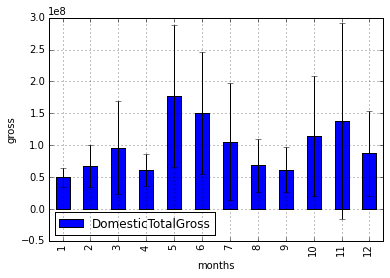

In [342]:
#6 Bin your dataset into years (if applicable) and make a bar graph with error bars of gross each year
c6 = df.convert_objects(convert_numeric=True)
c6 = c6[['ReleaseDate', 'DomesticTotalGross']]
dates = pd.DatetimeIndex(c6['ReleaseDate'])
errors = c6.groupby(dates.month).std()
ax=c6.groupby(dates.month).mean().plot(yerr=errors, kind='bar')
ax.set_xlabel("months")
ax.set_ylabel("gross")